# Clasificacion Basica: Predecir una imagen de moda

Esta Guia entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Esta Guia usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

In [42]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


## Importar el set de datos de moda de MNIST

Esta guia usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Para importar y cargar el set de datos de MNIST directamente de TensorFlow:

In [43]:
import ssl 
ssl._create_default_https_context = ssl._create_unverified_context  

In [44]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta. Ya que los *Class names* no estan incluidos en el dataset. Los guardamos en la siguiente lista:

In [45]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore el set de datos

* ¿Cuántas imagenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?

In [46]:
print("Train images:", train_images.shape)
print("Test images:",test_images.shape)
np.unique(train_labels)

Train images: (60000, 28, 28)
Test images: (10000, 28, 28)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

* 70,000 grayscale images of 28x28 pixels of 10 different clothing categories 

* train_images - 60,000 training images
* train_labels - 60,000 corresponding labels for the training images (0-9)
* test_images - 10,000 test images
* test_labels - 10,000 corresponding labels for the test images


## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

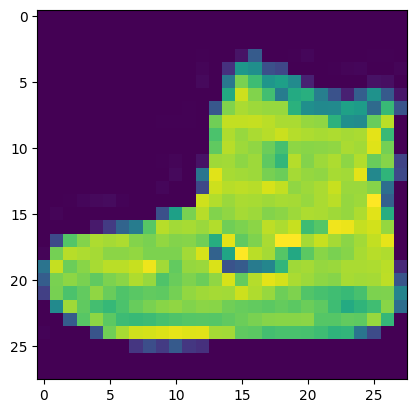

In [47]:
import matplotlib.pyplot as plt

img_predict = train_images[0]
plt.imshow(img_predict, cmap='viridis')
plt.show()


Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [48]:
train_images = train_images / 255.0

test_images = test_images / 255.0

The original pixel range = 0 to 255. 
div /  255 range = 0 to 1

* Neural networks tend to perform better when input data is normalized to a similar scale. Having pixel values between 0-1 puts them all on a comparable scale.

* Gradient descent works better when input variables are normalized, allowing it to converge faster.

* ReLU perform better when inputs are normalized to 0-1. It centers the inputs to the active part of the activation function.

The model weights during training will initialize to small random values approximately ~ N(0, 0.001). Normalizing the inputs to 0-1 range makes the input and weight values comparable in scale.



Para verificar que el set de datos esta en el formato adecuado y que estan listos para construir y entrenar la red, vamos a desplegar las primeras 25 imagenes de el *training set* y despleguemos el nombre de cada clase debajo de cada imagen.

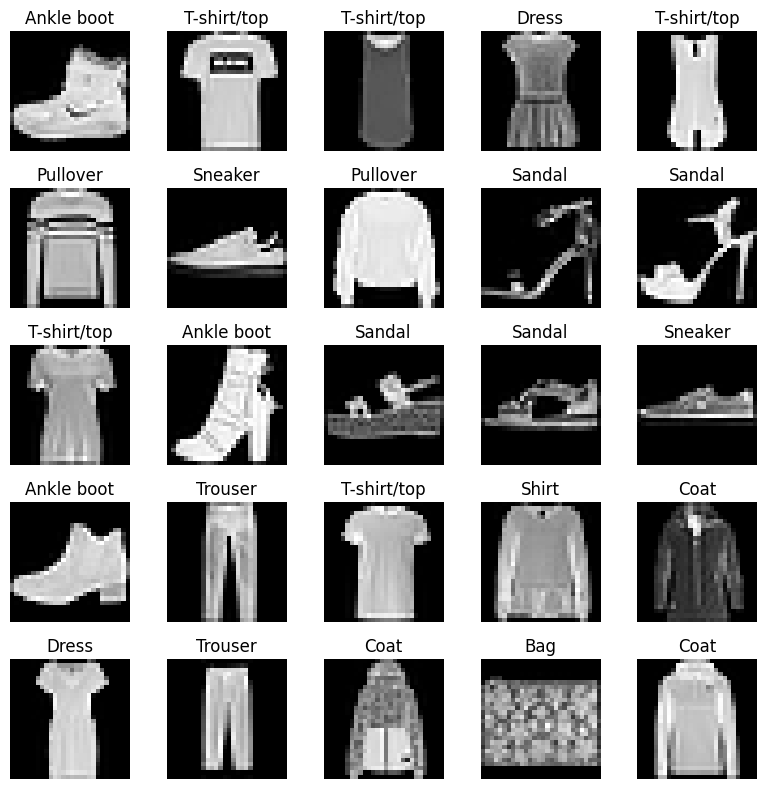

In [49]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# first 25 images 
images = train_images[:25]
labels = train_labels[:25]

# Plot
fig, axs = plt.subplots(5, 5, figsize=(8,8))

for i in range(25):
    ax = axs[i//5, i%5]
    ax.imshow(images[i], cmap='gray')
    ax.set_title(class_names[labels[i]])
    ax.axis('off')

plt.tight_layout()
plt.show()


## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

keras.Sequential() creates a sequential model, which means the layers will be stacked linearly and flatten to reshape the input, followed by two dense layers, with ReLU and softmax activations for a simple classification model architecture.

In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones mas. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta funcion para dirigir el modelo en la direccion adecuada.
* *Optimizer* — Esto es como el modelo se actualiza basado en el set de datos que ve y la funcion de perdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.

Prueba en el posterior entrenamiento varios optimizadores.

Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [51]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**optimizer='adam'** sets the optimization algorithm for training the model. Adam is an efficient stochastic gradient descent algorithm that works well for training neural networks.

**loss='sparse_categorical_crossentropy'** specifies the loss function to minimize during training. For multi-class classification we want to use categorical crossentropy between the true labels and predicted probabilities.

**metrics=['accuracy']** tracks the classification accuracy during training and testing. This is the metric we want to monitor.

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [52]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4979 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3777 - accuracy: 0.8640
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3371 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3149 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2952 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2815 - accuracy: 0.8965
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2674 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2582 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2479 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - lo

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

In [53]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('Test accuracy:', test_acc)


313/313 - 1s - loss: 0.3289 - accuracy: 0.8879 - 709ms/epoch - 2ms/step
Test accuracy: 0.8878999948501587


Small difference between training accuracy and test accuracy due to overfitting.



## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [54]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba). Miremos la primera prediccion:

In [55]:
predictions[0]

array([4.0740257e-08, 2.3568094e-11, 6.2953568e-08, 5.9746075e-12,
       8.2034726e-09, 2.4195437e-03, 6.8585898e-08, 3.2601084e-03,
       1.4096062e-08, 9.9432015e-01], dtype=float32)

*una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [56]:
np.argmax(predictions[0])

9

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificaion es correcta:

In [57]:
test_labels[0]

9

**Grafica** esto para poder ver todo el set de la prediccion de las 10 clases.

Miremos la imagen [0], sus predicciones y el array de predicciones. Las etiquetas de prediccion correctas estan en azul y las incorrectas estan en rojo. El numero entrega el porcentaje (sobre 100) para la etiqueta predecida.

1/1 [==============================] - 0s 83ms/step
Actual label: 9
Predicted label: 9
T-shirt/top: 0.00%
Trouser: 0.00%
Pullover: 0.00%
Dress: 0.00%
Coat: 0.00%
Sandal: 0.24%
Shirt: 0.00%
Sneaker: 0.33%
Bag: 0.00%
Ankle boot: 99.43%


([<matplotlib.axis.XTick at 0x13bd9bed0>,
 [Text(0, 0, 'T-shirt/top'),
  Text(1, 0, 'Trouser'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dress'),
  Text(4, 0, 'Coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'),
  Text(9, 0, 'Ankle boot')])

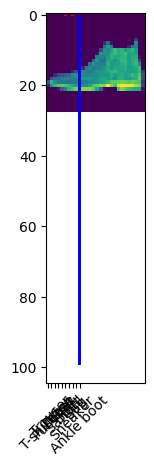

In [58]:
import matplotlib.pyplot as plt

# predictions for first image
predictions = model.predict(test_images[:1]) 

# actual label for first image
actual_label = test_labels[0]  

# Plot 
plt.imshow(test_images[0])

# Print actual and predicted label
print("Actual label:", actual_label) 
print("Predicted label:", np.argmax(predictions[0]))

# Get confidence scores for each label
confidence_scores = predictions[0] * 100 

# Print confidence scores
for i, score in enumerate(confidence_scores):
    print(f"{class_names[i]}: {score:.2f}%")
    
# Highlight correct prediction in blue, incorrect in red
colors = ["red" if i != np.argmax(predictions[0]) else "blue" for i in range(10)]

# Plot bar chart with confidence scores for each label
plt.bar(range(10), confidence_scores, color=colors)
plt.xticks(range(10), class_names, rotation=45)


Vamos a graficar multiples imagenes con sus predicciones. Notese que el modelo puede estar equivocado aun cuando tiene mucha confianza.

1/1 [==============================] - 0s 45ms/step


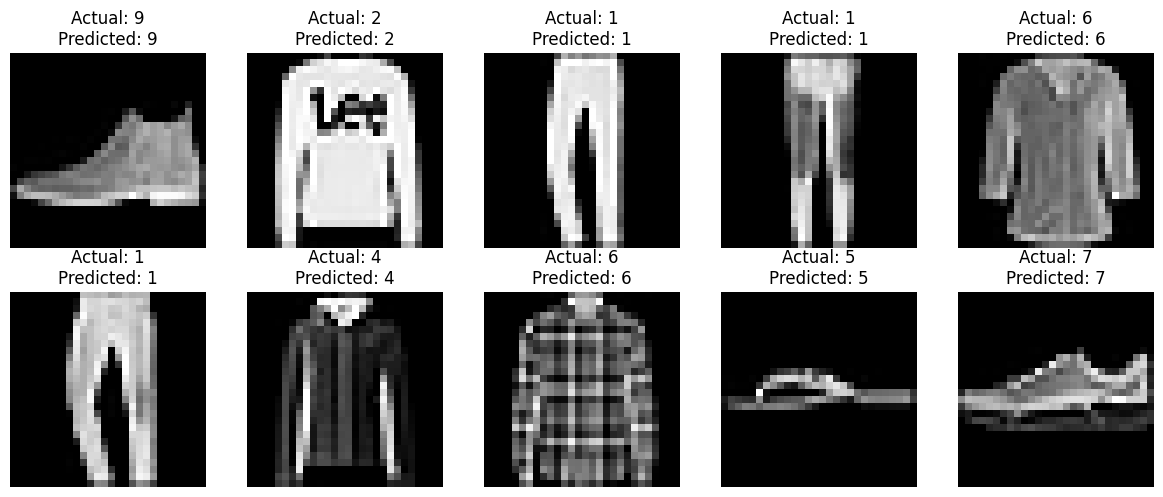

In [59]:
# Predict on the first 10 test images 
predictions = model.predict(test_images[:10])

# image / predictions
fig, axs = plt.subplots(2, 5, figsize=(12, 5))
for i in range(10):
    ax = axs[i//5, i%5]
    ax.imshow(test_images[i], cmap='gray')
    ax.set_title(f"Actual: {test_labels[i]}\nPredicted: {np.argmax(predictions[i])}")
    ax.axis('off')

plt.tight_layout()
plt.show()


Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una unica imagen.

In [83]:
img_predict = test_images[0] # choose image
img_predict = (np.expand_dims(img_predict,0)) #expands the dimensions of that image to match the expected input shape for the model 
prediction = model.predict(img_predict) #prediction 
print(prediction)

1/1 [==============================] - 0s 42ms/step
[[4.0740179e-08 2.3568050e-11 6.2953568e-08 5.9745963e-12 8.2034566e-09
  2.4195425e-03 6.8585898e-08 3.2601024e-03 1.4095981e-08 9.9432015e-01]]
